<a href="https://colab.research.google.com/github/mjairamchandr21/CodeAlpha_Tasks/blob/main/CodeAlpha_CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data.csv


In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv('/content/car data.csv')  # Adjust filename if needed
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Drop duplicates and check for nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Create a new column: Age of the car
df['car_age'] = 2025 - df['Year']  # Assuming data is till 2020
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [10]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [12]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.7527233824220487
Mean Squared Error: 6.373125106260704


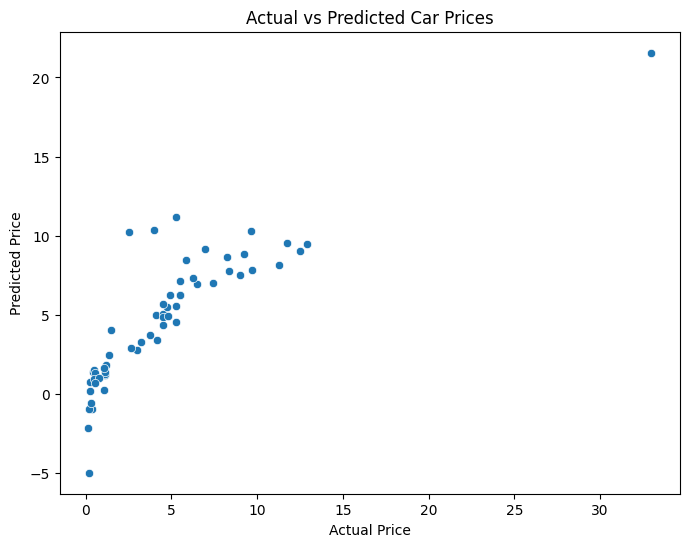

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
